<a href="https://colab.research.google.com/github/sawsanzaky/Deep_learning/blob/main/Deep_Learning_in_Keras_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Deep Learning in Keras - Building a Deep Learning Model**

import library 

In [36]:
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

**Load Dataset**

In [20]:
data= sns.load_dataset("iris")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Data Analysis 

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [25]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [21]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [23]:
data.species.value_counts()

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

In [28]:
feature = data.iloc[:,0:-1]
label = data.iloc[:,-1]


In [34]:
#convert Label into numerical 
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = data.select_dtypes(include=[object])
y = y.apply(le.fit_transform)
y

,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


**Train and Split**

In [38]:
X_train, X_test, y_train, y_test = train_test_split(feature, y, test_size = 0.20)
X_train

,sepal_length,sepal_width,petal_length,petal_width
74,6.4,2.9,4.3,1.3
86,6.7,3.1,4.7,1.5
0,5.1,3.5,1.4,0.2
116,6.5,3.0,5.5,1.8
121,5.6,2.8,4.9,2.0
...,...,...,...,...
135,7.7,3.0,6.1,2.3
105,7.6,3.0,6.6,2.1
36,5.5,3.5,1.3,0.2
88,5.6,3.0,4.1,1.3


In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Model 

In [40]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
    layers.Dropout(0.3, seed=2),
    layers.Dense(64, activation='swish'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='swish'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='swish'),
    layers.Dense(1)
])

In [41]:
model

Optimizer and Activation function 

In [42]:
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)

model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=optimizer,
              metrics=['mae'])

**Training the Model**

In [43]:
history = model.fit(
    X_train, y_train,
    epochs=70, validation_split=0.2
)

Epoch 1/70
3/3 [==============================] - 2s 101ms/step - loss: 1.5984 - mae: 1.0515 - val_loss: 0.9375 - val_mae: 0.7742
Epoch 2/70
3/3 [==============================] - 0s 13ms/step - loss: 0.9873 - mae: 0.8494 - val_loss: 0.3667 - val_mae: 0.4996
Epoch 3/70
3/3 [==============================] - 0s 14ms/step - loss: 0.2827 - mae: 0.4271 - val_loss: 0.1218 - val_mae: 0.2481
Epoch 4/70
3/3 [==============================] - 0s 13ms/step - loss: 0.1829 - mae: 0.3158 - val_loss: 0.0905 - val_mae: 0.2259
Epoch 5/70
3/3 [==============================] - 0s 14ms/step - loss: 0.0845 - mae: 0.2163 - val_loss: 0.0864 - val_mae: 0.2323
Epoch 6/70
3/3 [==============================] - 0s 15ms/step - loss: 0.0941 - mae: 0.2159 - val_loss: 0.0705 - val_mae: 0.1909
Epoch 7/70
3/3 [==============================] - 0s 12ms/step - loss: 0.0718 - mae: 0.1880 - val_loss: 0.0703 - val_mae: 0.1992
Epoch 8/70
3/3 [==============================] - 0s 14ms/step - loss: 0.0990 - mae: 0.2294 - va

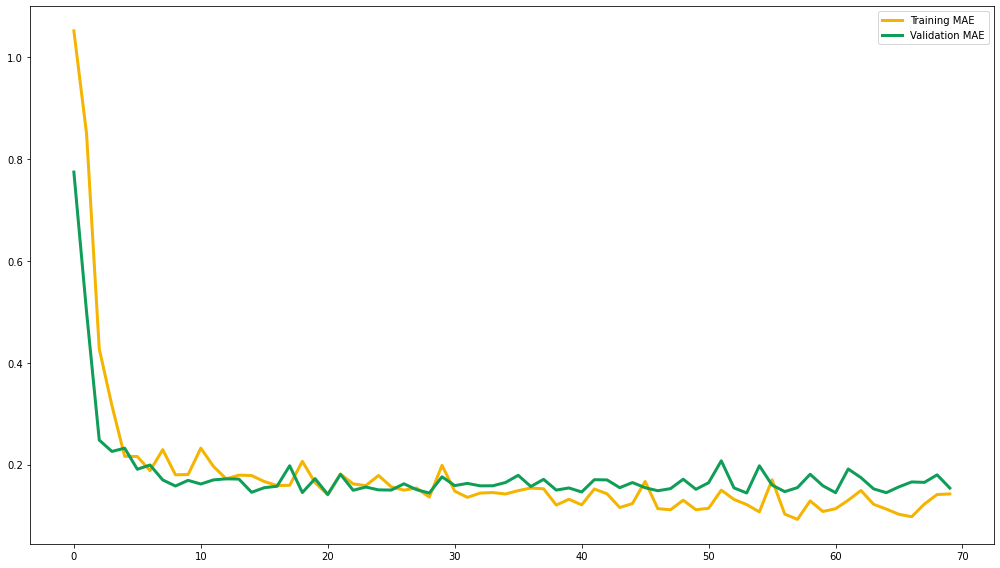

In [44]:
model_history = pd.DataFrame(history.history)
model_history['epoch'] = history.epoch

fig, ax = plt.subplots(figsize=(14,8))
num_epochs = model_history.shape[0]
ax.plot(np.arange(0, num_epochs), model_history["mae"], 
        label="Training MAE", lw=3, color='#f4b400')
ax.plot(np.arange(0, num_epochs), model_history["val_mae"], 
        label="Validation MAE", lw=3, color='#0f9d58')
ax.legend()
plt.tight_layout()
plt.show()

**Making Predictions with the Model**

In [49]:
test_pred = model.predict(X_test)
test_pred


array([[1.0172846 ],
       [1.7606255 ],
       [0.00280002],
       [2.136881  ],
       [0.00640704],
       [0.00766133],
       [0.00927092],
       [0.00684957],
       [1.8237172 ],
       [2.10381   ],
       [2.1091714 ],
       [0.01094428],
       [1.0538894 ],
       [1.3475527 ],
       [0.00226999],
       [0.00731057],
       [0.00524963],
       [1.3340172 ],
       [1.9740278 ],
       [1.89584   ],
       [2.0715897 ],
       [2.1099412 ],
       [0.00876615],
       [1.0532161 ],
       [0.00451342],
       [0.01082487],
       [1.3234758 ],
       [2.1613219 ],
       [0.00666309],
       [0.0098895 ]], dtype=float32)

In [50]:
X_test

array([[-0.94176125, -1.25645579, -0.49793582, -0.17827054],
       [ 1.02365353, -0.07112014,  0.66796268,  0.63410153],
       [-1.43311494,  0.40301412, -1.48894954, -1.39682863],
       [ 0.65513826,  0.40301412,  0.84284745,  1.44647359],
       [-0.94176125,  1.8254169 , -1.37235969, -1.26143328],
       [-0.81892282,  1.11421551, -1.37235969, -1.39682863],
       [-0.57324598,  2.06248403, -1.25576984, -1.12603794],
       [-1.06459967,  0.64008125, -1.43065461, -1.39682863],
       [ 0.40946141, -0.5452544 ,  0.55137283,  0.76949687],
       [ 1.88352249, -0.5452544 ,  1.30920685,  0.90489221],
       [ 1.63784564,  1.35128264,  1.30920685,  1.71726427],
       [-1.06459967,  1.11421551, -1.31406476, -0.85524725],
       [ 0.9008151 , -0.07112014,  0.31819313,  0.22791549],
       [ 1.26933037,  0.16594699,  0.60966775,  0.36331084],
       [-1.80163021, -0.07112014, -1.48894954, -1.39682863],
       [-0.94176125,  0.87714838, -1.37235969, -1.39682863],
       [-1.31027651,  0.

**Evaluating the Model**

In [56]:
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print('MAE = {:.2f} \nLOSS = {:.2f}'.format(mae,loss))


MAE = 0.11 
LOSS = 0.05


**Data Visulaization**

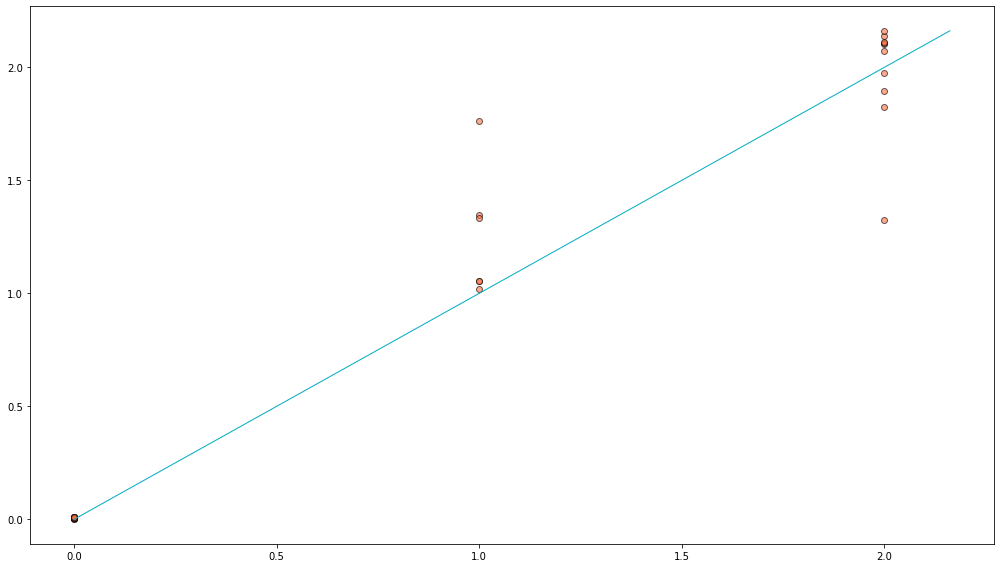

In [58]:
test_predictions_ = model.predict(X_test).flatten()
test_labels_ = y_test.to_numpy().flatten()
fig, ax = plt.subplots(figsize=(14,8))
plt.scatter(test_labels_, test_predictions_, alpha=0.6, 
            color='#ff7043', lw=1, ec='black')
lims = [0, max(test_predictions_.max(), test_labels_.max())]
plt.plot(lims, lims, lw=1, color='#00acc1')
plt.tight_layout()
plt.show()